# Data Modelling

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


%matplotlib inline

In [101]:
# Importing the data

In [102]:
data = pd.read_csv('clean_data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,IntrntSrvc_DSL,IntrntSrvc_FiberOptic,...,Contract_OneYear,Contract_TwoYear,PaperlessBilling,PayMthd_BankTransfer,PayMthd_CreditCard,PayMthd_ElectronicCheck,PayMthd_MailedCheck,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,True,False,...,False,False,1,False,False,True,False,29.84,29.84,0
1,5575-GNVDE,1,0,0,0,34,1,0,True,False,...,True,False,0,False,False,False,True,56.94,1890.00,0
2,3668-QPYBK,1,0,0,0,2,1,0,True,False,...,False,False,1,False,False,False,True,53.84,108.10,1
3,7795-CFOCW,1,0,0,0,45,0,0,True,False,...,True,False,0,True,False,False,False,42.30,1841.00,0
4,9237-HQITU,0,0,0,0,2,1,0,False,True,...,False,False,1,False,False,True,False,70.70,151.60,1


In [103]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'IntrntSrvc_DSL',
       'IntrntSrvc_FiberOptic', 'IntrntSrvc_No', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract_Monthly', 'Contract_OneYear',
       'Contract_TwoYear', 'PaperlessBilling', 'PayMthd_BankTransfer',
       'PayMthd_CreditCard', 'PayMthd_ElectronicCheck', 'PayMthd_MailedCheck',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [104]:
len(data.columns)

28

# Data Preprocessing

In [105]:
# Customer ID is not relevant for deciding whether or not if a customer is going to churn or not
# so we drop it
data.drop('customerID', axis = 1 , inplace = True)

In [106]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,IntrntSrvc_DSL,IntrntSrvc_FiberOptic,IntrntSrvc_No,...,Contract_OneYear,Contract_TwoYear,PaperlessBilling,PayMthd_BankTransfer,PayMthd_CreditCard,PayMthd_ElectronicCheck,PayMthd_MailedCheck,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,True,False,False,...,False,False,1,False,False,True,False,29.84,29.84,0
1,1,0,0,0,34,1,0,True,False,False,...,True,False,0,False,False,False,True,56.94,1890.00,0
2,1,0,0,0,2,1,0,True,False,False,...,False,False,1,False,False,False,True,53.84,108.10,1
3,1,0,0,0,45,0,0,True,False,False,...,True,False,0,True,False,False,False,42.30,1841.00,0
4,0,0,0,0,2,1,0,False,True,False,...,False,False,1,False,False,True,False,70.70,151.60,1


In [107]:
# Inorder for feature selection, we need convert data from bool to numerical (int)
# We identify such columns below
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7015 entries, 0 to 7014
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   7015 non-null   int64  
 1   SeniorCitizen            7015 non-null   int64  
 2   Partner                  7015 non-null   int64  
 3   Dependents               7015 non-null   int64  
 4   tenure                   7015 non-null   int64  
 5   PhoneService             7015 non-null   int64  
 6   MultipleLines            7015 non-null   int64  
 7   IntrntSrvc_DSL           7015 non-null   bool   
 8   IntrntSrvc_FiberOptic    7015 non-null   bool   
 9   IntrntSrvc_No            7015 non-null   bool   
 10  OnlineSecurity           7015 non-null   int64  
 11  OnlineBackup             7015 non-null   int64  
 12  DeviceProtection         7015 non-null   int64  
 13  TechSupport              7015 non-null   int64  
 14  StreamingTV             

In [108]:
bool2int = ['IntrntSrvc_DSL','IntrntSrvc_FiberOptic','IntrntSrvc_No','Contract_Monthly','Contract_OneYear','Contract_TwoYear','PayMthd_BankTransfer','PayMthd_CreditCard','PayMthd_ElectronicCheck','PayMthd_MailedCheck']

In [109]:
from numpy import int64


data[bool2int] = data[bool2int].astype(int64)

In [110]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,IntrntSrvc_DSL,IntrntSrvc_FiberOptic,IntrntSrvc_No,...,Contract_OneYear,Contract_TwoYear,PaperlessBilling,PayMthd_BankTransfer,PayMthd_CreditCard,PayMthd_ElectronicCheck,PayMthd_MailedCheck,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,29.84,29.84,0
1,1,0,0,0,34,1,0,1,0,0,...,1,0,0,0,0,0,1,56.94,1890.00,0
2,1,0,0,0,2,1,0,1,0,0,...,0,0,1,0,0,0,1,53.84,108.10,1
3,1,0,0,0,45,0,0,1,0,0,...,1,0,0,1,0,0,0,42.30,1841.00,0
4,0,0,0,0,2,1,0,0,1,0,...,0,0,1,0,0,1,0,70.70,151.60,1


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7015 entries, 0 to 7014
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   7015 non-null   int64  
 1   SeniorCitizen            7015 non-null   int64  
 2   Partner                  7015 non-null   int64  
 3   Dependents               7015 non-null   int64  
 4   tenure                   7015 non-null   int64  
 5   PhoneService             7015 non-null   int64  
 6   MultipleLines            7015 non-null   int64  
 7   IntrntSrvc_DSL           7015 non-null   int64  
 8   IntrntSrvc_FiberOptic    7015 non-null   int64  
 9   IntrntSrvc_No            7015 non-null   int64  
 10  OnlineSecurity           7015 non-null   int64  
 11  OnlineBackup             7015 non-null   int64  
 12  DeviceProtection         7015 non-null   int64  
 13  TechSupport              7015 non-null   int64  
 14  StreamingTV             

# Feature Scaling

In [117]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
data['tenure'] = mms.fit_transform(data[['tenure']])
data['MonthlyCharges'] = mms.fit_transform(data[['MonthlyCharges']])
data['TotalCharges'] = mms.fit_transform(data[['TotalCharges']])

# Train Test Split

In [118]:
X = data.drop('Churn', axis = 1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model Training

In [123]:

def train_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    evaluate(y_test,y_pred)

def evaluate(y_test,y_pred):
    print(classification_report(y_test,y_pred))

In [124]:
## Baseline Model Logistic Regression
from sklearn.linear_model import LogisticRegression
train_model(LogisticRegression(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1694
           1       0.68      0.53      0.60       621

    accuracy                           0.81      2315
   macro avg       0.76      0.72      0.74      2315
weighted avg       0.80      0.81      0.80      2315



In [125]:
## Support Vector Classifier
from sklearn.svm import SVC
train_model(SVC(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1694
           1       0.69      0.49      0.58       621

    accuracy                           0.81      2315
   macro avg       0.76      0.71      0.72      2315
weighted avg       0.79      0.81      0.79      2315



In [126]:
from sklearn.ensemble import RandomForestClassifier
train_model(RandomForestClassifier(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1694
           1       0.69      0.50      0.58       621

    accuracy                           0.80      2315
   macro avg       0.76      0.71      0.72      2315
weighted avg       0.79      0.80      0.79      2315



In [127]:
from sklearn.tree import DecisionTreeClassifier
train_model(DecisionTreeClassifier(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1694
           1       0.52      0.52      0.52       621

    accuracy                           0.74      2315
   macro avg       0.67      0.67      0.67      2315
weighted avg       0.74      0.74      0.74      2315



In [128]:
from sklearn.naive_bayes import GaussianNB
train_model(GaussianNB(),X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1694
           1       0.51      0.77      0.62       621

    accuracy                           0.74      2315
   macro avg       0.71      0.75      0.71      2315
weighted avg       0.79      0.74      0.75      2315



In [145]:
## Neural Network Model
from sklearn.preprocessing import LabelEncoder
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [146]:
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) 
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])


es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', 
                                   patience=10,
                                   restore_best_weights=True)

history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=80, 
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                432       
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/80
376/376 [==============================] - 3s 4ms/step - loss: 0.5079 - accuracy: 0.7255 - val_loss: 0.4625 - val_accuracy: 0.7628
Epoch 2/80
376/376 [==============================] - 1s 3ms/step - loss: 0.4280 - accuracy: 0.7928 - val_loss: 0.4464 - val_accuracy: 0.7819
Epoch 3/80
376/376 [==============================] - 1s 3ms/step - loss: 0.4216 - accuracy: 0.7926 - val_loss: 0.4422 - val_accuracy: 0.7809
Epoch 4/80
376/376 [==============================] - 1s 3ms/step - loss: 0.4184 - accuracy: 0.8000 - val_loss: 0.4384 - val_accuracy: 0.7830
Epoch 5/80
376/376 [==============================] - 1s 3ms/step - loss: 0.4162 - accuracy: 0.8040 - val_loss: 0.4361 - val_accuracy: 0.7819
Epoch 6/80
376/376 [==============================] - 1s 3ms/step - loss: 0.4126 - accuracy: 0.8069 - val_loss: 0.4351 - val_accuracy: 0.7840
Epoch 7/80
376/376 [==============================] - 1s 3ms/step - loss: 0.4115 - accuracy: 0.8066 - val_loss: 0.4324 - val_accuracy: 0.7840
Epoch 

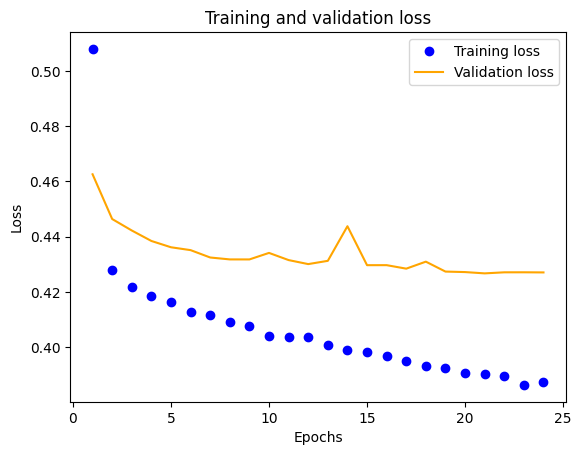

In [147]:
history_dict = history.history


loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1) 

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

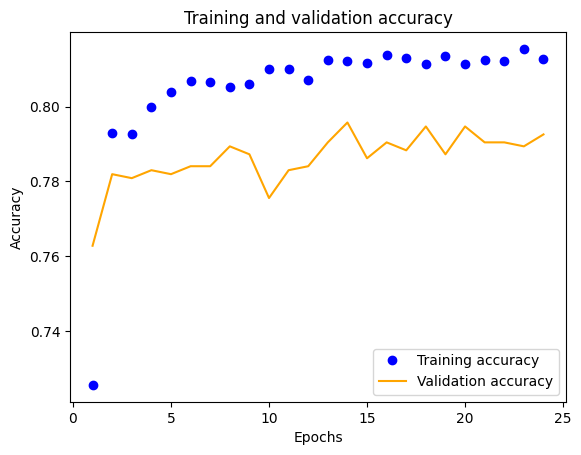

0.7957446575164795

In [148]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

np.max(val_acc)

In [150]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

np.round(model.predict(X_test),0)

preds = np.round(model.predict(X_test),0)


print(confusion_matrix(y_test, preds)) 
print(classification_report(y_test, preds))

73/73 [==============================] - 0s 2ms/step
[[1602   92]
 [ 376  245]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1694
           1       0.73      0.39      0.51       621

    accuracy                           0.80      2315
   macro avg       0.77      0.67      0.69      2315
weighted avg       0.79      0.80      0.78      2315

